<div style="text-align: center;">
<figure>
<img src="Cover.jpg" alt="Effervescent Tablet" width="100%">
<p style="text-align: center;">Image source: <a href="https://www.visualcapitalist.com/histomap/">Histomap, published by Rand McNally in 1931</a></p>
</figure>
</div>

# Computational History

[**Jozsef Konczer**](https://konczer.github.io/)

@ [Milestone Instititute](https://archive.milestone-institute.org/module/2022-2023/22-2-data-science/)

## Questions:

* What kind of Historical countries existed in Europe?
* How are these connected to each other?
    * How can we quantify relatedness, or impact?
* How are Historical Countries related to present Countries?

## Abstraction:

### Data Source:

* [Wolfram Knowledgebase](https://www.wolfram.com/knowledgebase/source-information/)
    * relevant command in [Wolfram Mathematica](https://www.wolfram.com/mathematica/):
    * ```EntityList[EntityClass["HistoricalCountry", {}]]```
    * for details see [ComputationalHistoryPresentation.nb](https://github.com/Konczer/DataScienceCourse/blob/main/04_History/Mathematica/ComputationalHistoryPresentation.nb)

### Relevant Other Databases:

* https://www.worldstatesmen.org/GEOG.html
* http://geacron.com/home-en/
* https://icr.ethz.ch/data/cshapes/
* https://github.com/aourednik/historical-basemaps

## Computation:

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import json
import itertools

# pd.set_option('display.expand_frame_repr', False)
# pd.set_option('display.max_colwidth', None)

Importing or installing tools from [astropy](https://www.astropy.org/) for handling historical dates (this is needed to owercome pandas [timestamp-limitations](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timestamp-limitations)):

In [2]:
# pip install astropy, if needed

try:
    from astropy.time import Time
    import astropy.units as u
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','astropy'])
    from astropy.time import Time
    import astropy.units as u

In [3]:
# Examples of astropy date formats:

t1 = Time('+00001-03-01', format='fits') + 100 * u.year
t2 = Time('+00201-03-01', format='fits')
t1>t2

/home/josi/anaconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/josi/anaconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/josi/anaconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/home/josi/anaconda3/envs/py39/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


False

In [4]:
type(t1)

astropy.time.core.Time

### Importing data from JSON file:

In [5]:
with open('EuHistoricalStates.json', 'r') as f:
    historical_countries = json.load(f)

In [6]:
import warnings
from astropy.utils.exceptions import ErfaWarning

In [7]:
def string2astrodate(s):
    """
    converts year-month-day format to an astropy date object
    Example: string2astrodate("1918-05-11")

    Args:
        s (str): date string

    Returns:
        astropy.time.core.Time: astropy date object
    """

    if s[0] != '-':
        s = '+' + s
        
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ErfaWarning, message=".*dubious year.*")
        
        res=Time(s.zfill(12), format='fits')
    
    return res

In [8]:
hdicts = []
for k, v in list(historical_countries.items())[:]:
    hd = {'country': k, 'start' : string2astrodate(v['start']), 'end' : string2astrodate(v['end']), 'territory_geolocations' : v['territory_geolocations']}
    hdicts.append(hd)
historical_countries_df = pd.DataFrame(hdicts)

In [37]:
historical_countries_df

,country,start,end,territory_geolocations
0,State Union of Serbia and Montenegro,2003-02-04T00:00:00.000,2006-06-05T00:00:00.000,"[[[46.14939437647686, 19.984130859375], [46.15..."
1,Federal Republic of Yugoslavia,1992-04-28T00:00:00.000,2003-02-04T00:00:00.000,"[[[46.14939437647686, 19.984130859375], [46.15..."
2,Republic Of Bosnia And Herzegovina,1993-01-01T00:00:00.000,1998-01-01T00:00:00.000,"[[[45.22538552491986, 16.995849609375], [45.20..."
3,United States Occupation Zone in Austria,1947-01-01T00:00:00.000,1995-01-01T00:00:00.000,"[[[48.5311570109767, 13.634033203124961], [48...."
4,United States Occupation Zone in Germany,1947-01-01T00:00:00.000,1995-01-01T00:00:00.000,"[[[51.630293453926896, 9.575683593750025], [51..."
...,...,...,...,...
298,Roman Kingdom,-00753-01-01T00:00:00.000,-00509-01-01T00:00:00.000,"[[[41.948051592688245, 12.6123046875], [41.902..."
299,Mycenae,-01600-01-01T00:00:00.000,-01100-01-01T00:00:00.000,"[[[40.50210484435058, 22.139648437500007], [40..."
300,Land of the City of Hattusa,-01700-01-01T00:00:00.000,-01180-01-01T00:00:00.000,"[[[40.807157004593165, 35.55395507812501], [40..."
301,Minoan civilization,-02700-01-01T00:00:00.000,-01450-01-01T00:00:00.000,"[[[35.60907810719779, 23.7744140625], [35.5626..."


In [10]:
historical_countries_df['end'][0]

<Time object: scale='utc' format='fits' value=2006-06-05T00:00:00.000>

In [11]:
historical_countries_df.dtypes

country                   object
start                     object
end                       object
territory_geolocations    object
dtype: object

In [12]:
historical_countries_df_sort = historical_countries_df.sort_values(by="end", ascending=False)

In [13]:
historical_countries_df_sort

,country,start,end,territory_geolocations
0,State Union of Serbia and Montenegro,2003-02-04T00:00:00.000,2006-06-05T00:00:00.000,"[[[46.14939437647686, 19.984130859375], [46.15..."
1,Federal Republic of Yugoslavia,1992-04-28T00:00:00.000,2003-02-04T00:00:00.000,"[[[46.14939437647686, 19.984130859375], [46.15..."
2,Republic Of Bosnia And Herzegovina,1993-01-01T00:00:00.000,1998-01-01T00:00:00.000,"[[[45.22538552491986, 16.995849609375], [45.20..."
3,United States Occupation Zone in Austria,1947-01-01T00:00:00.000,1995-01-01T00:00:00.000,"[[[48.5311570109767, 13.634033203124961], [48...."
4,United States Occupation Zone in Germany,1947-01-01T00:00:00.000,1995-01-01T00:00:00.000,"[[[51.630293453926896, 9.575683593750025], [51..."
...,...,...,...,...
298,Roman Kingdom,-00753-01-01T00:00:00.000,-00509-01-01T00:00:00.000,"[[[41.948051592688245, 12.6123046875], [41.902..."
299,Mycenae,-01600-01-01T00:00:00.000,-01100-01-01T00:00:00.000,"[[[40.50210484435058, 22.139648437500007], [40..."
300,Land of the City of Hattusa,-01700-01-01T00:00:00.000,-01180-01-01T00:00:00.000,"[[[40.807157004593165, 35.55395507812501], [40..."
301,Minoan civilization,-02700-01-01T00:00:00.000,-01450-01-01T00:00:00.000,"[[[35.60907810719779, 23.7744140625], [35.5626..."


### Constructing the Adjacency matrix

#### Temporal structure:

In [39]:
# Temporal influence graph with a 100 year "shadow" of historical states

with warnings.catch_warnings():
    
        warnings.filterwarnings("ignore", category=ErfaWarning, message=".*dubious year.*")
        
        adj_matrix_temporal = [[((t1.end + 100 * u.year) > t2.start) and (t1.start < t2.end) for t2 in historical_countries_df_sort.itertuples()] for t1 in historical_countries_df_sort.itertuples()]


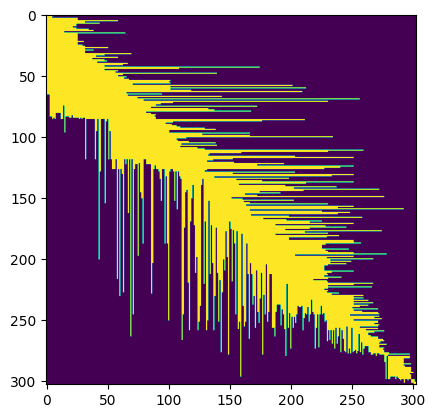

In [40]:
plt.imshow(adj_matrix_temporal)

In [16]:
np.array(adj_matrix_temporal).sum()

24841

In [17]:
index_list=np.transpose(np.nonzero(np.array(adj_matrix_temporal)))

In [18]:
len(index_list)

24841

In [19]:
sorted_index_list=list(np.unique(list(map(lambda ij: list(sorted(ij)), index_list)),axis=0))

In [20]:
type(True)

bool

#### Spatial structure:

In [21]:
from shapely.geometry import Polygon

def empires_intersect(e1, e2):
    """Determines if the territories of two empires has a non-empty intersection

    Args:
        e1 (list): Territory of the first empire in the form [[[lat_1, long_1], ... [lat_n1, long_n1]], ... ]
        e2 (list): Territory of the second empire

    Returns:
        bool: True if there is a non-empty intersection, False otherwise
    """

    for p1 in e1:
        for p2 in e2:
            if Polygon(p1).intersects(Polygon(p2)):
                return True
    return False

In [22]:
intersecting_ij_list=\
                np.array(
                        list(filter(lambda pair:
                                        pair[0]!=pair[1] and
                                        empires_intersect(
                                        historical_countries_df_sort['territory_geolocations'][pair[0]],
                                        historical_countries_df_sort['territory_geolocations'][pair[1]]),
                                sorted_index_list)
                        )
                )

#### Temporal and Spatial influence:

In [23]:
adj_matrix = [[adj_matrix_temporal[i][j] and (sorted([i,j]) in intersecting_ij_list.tolist()) for j in range(len(adj_matrix_temporal))] for i in range(len(adj_matrix_temporal))]

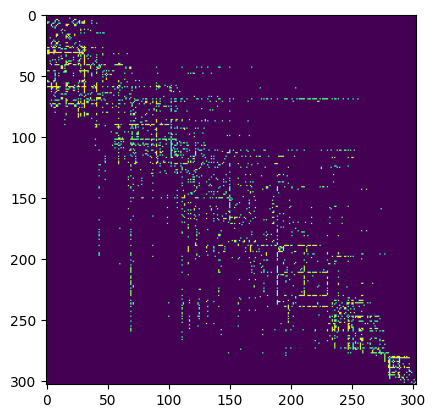

In [24]:
plt.imshow(adj_matrix)

### Causal Graph:

Using [NetworkX](https://networkx.org/) (other useful packeges might be [PyVis](https://pyvis.readthedocs.io/en/latest/index.html) or [Graph-tool](https://graph-tool.skewed.de/))

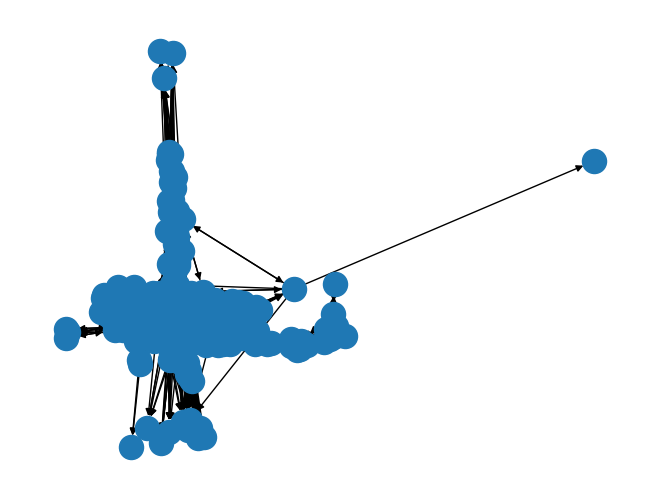

In [36]:
import networkx as nx

edge_list = list(np.transpose(np.nonzero(np.array(adj_matrix))))

# create graph
G = nx.DiGraph(edge_list)

pos = nx.spring_layout(G, k=10., dim=2, iterations=10000)
nx.draw(G, pos)

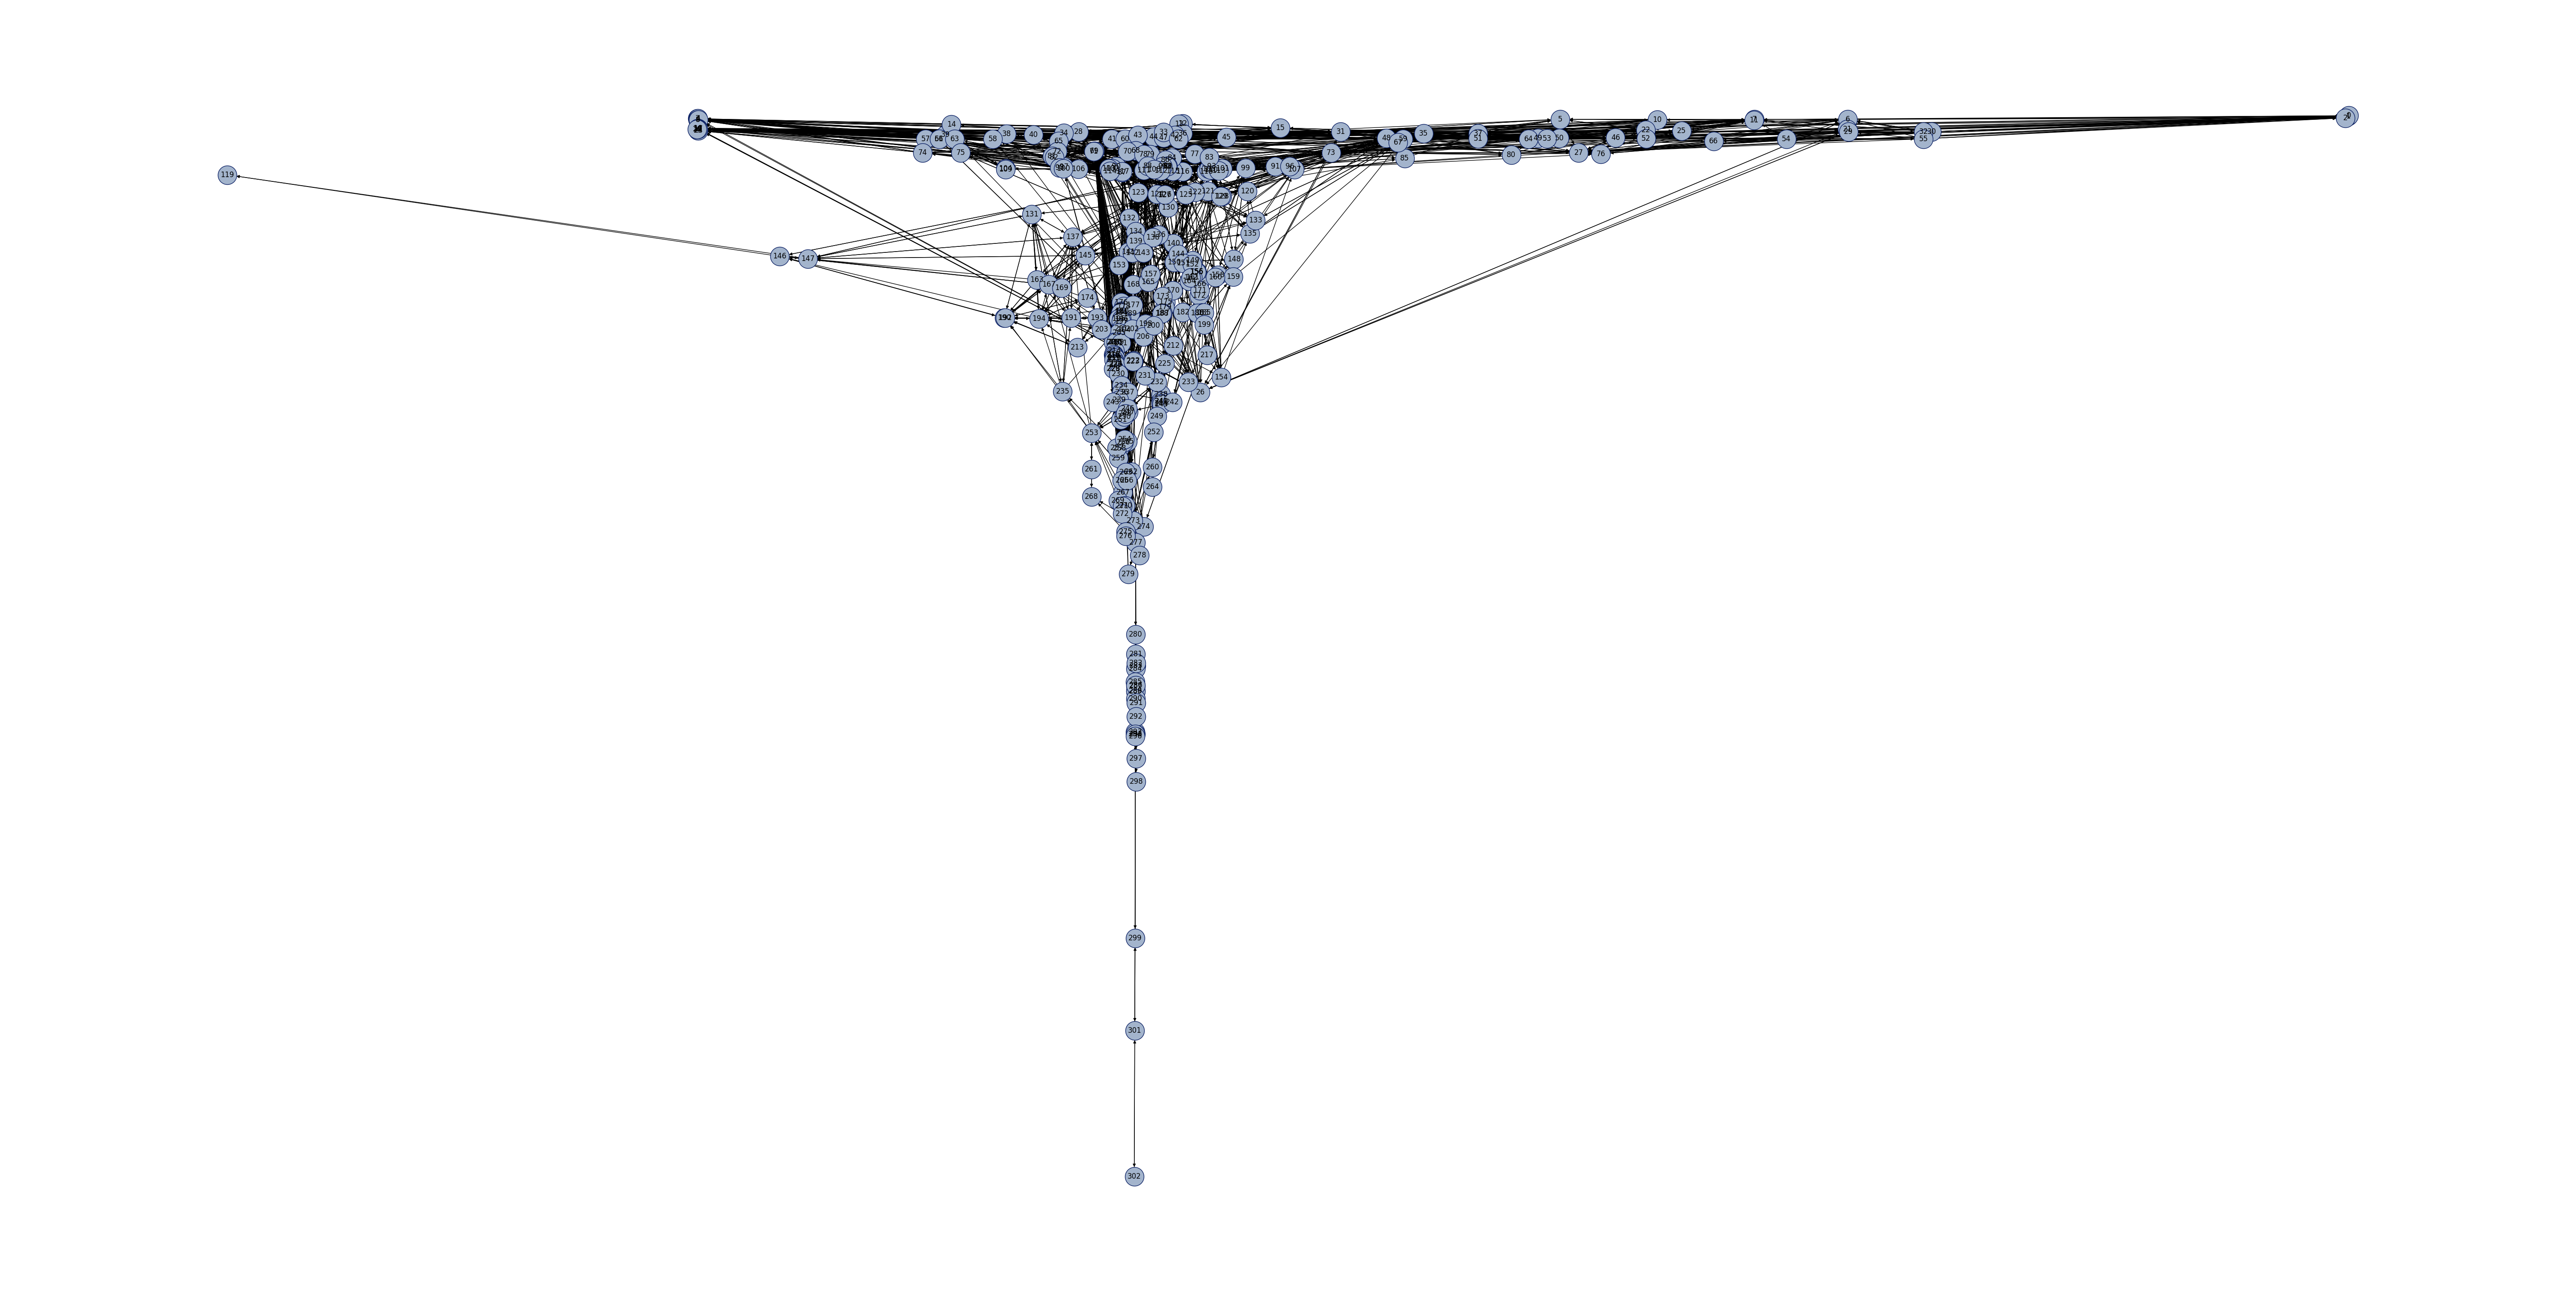

In [42]:
# Graph layered by the End Date of a historical country

plt.figure(figsize=(60, 30))
pos = nx.spring_layout(G, iterations=10000)

# set each node's y positions by the county's end year
for node in pos:
    with warnings.catch_warnings():
    
        warnings.filterwarnings("ignore", category=ErfaWarning, message=".*dubious year.*")

        year = (historical_countries_df_sort['end'][node] -  Time('+00000-01-01', format='fits')).jd / 365
    
    pos[node] += (0, 10 * year)

nx.draw(G, pos, node_size=1000, node_color='#a3b4cc', edgecolors='#0a1f63', with_labels=True)
plt.show()

### Saving data to a standard .gml format:

In [34]:
nx.write_gml(G, "EuHistoryGraph.gml", stringizer=lambda node: historical_countries_df_sort['country'][node])

This can be opened by other network analysis and visualization tools:

* [Gephi](https://gephi.org/)
    * when Gephi is not rendering properly the command ```foo@bar:~$ MESA_LOADER_DRIVER_OVERRIDE=i965 ./gephi``` might solve the issue

    


## Interpretation:

* We were able to show European Historical countries from another perspective
* However:
    * The data is controversial
    * During data cleaning we filtered out a big portion of States (from 667 items in the database 303 had all relevant properties)
    * The causation relation was arbitrary (100 year old shadow overlap)
    * The Polygon of a Historical Country was fixed, no changes in area were addressed
    * The data sets may have an USA/EU centric bias

## Questions II:

* How to Improve the data?
* How to perform the calculations more effectively?
* How to check and validate the results?
* How to do more insightful visualizations?

## References and Resources:

* [nodegoat](https://nodegoat.net/) for Spatial and Temporal visualization:
* [The Programming Historian](https://programminghistorian.org/)
* [Optical character recognition](https://readcoop.eu/transkribus/)
* [Awesome Network Analysis](https://github.com/briatte/awesome-network-analysis)
* [Gephi tutorial](https://www.martingrandjean.ch/gephi-introduction/)